In [1]:
# 파일 불러와서 저장
import pandas as pd
train_data=pd.read_excel('2018~2023 2호선 역별 시간대별 승하차인원.xlsx')
train_data.head()

,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,...,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시
0,2018-01-01,2호선,201,시청,승차,37,57,77,106,179,...,568,610,698,798,765,630,633,617,392,176
1,2018-01-01,2호선,201,시청,하차,35,160,253,418,326,...,508,440,446,390,367,263,215,175,160,126
2,2018-01-01,2호선,202,을지로입구,승차,128,116,127,205,373,...,1468,1722,1798,2139,2478,2001,1862,2196,1804,863
3,2018-01-01,2호선,202,을지로입구,하차,109,431,647,1246,1139,...,1661,1710,1759,1548,1464,988,757,499,419,223
4,2018-01-01,2호선,203,을지로3가,승차,42,79,98,124,215,...,538,528,545,619,539,427,367,342,237,98


In [2]:
# 결측치 확인
train_data.isnull().sum()

날짜         0
호선         0
역번호        0
역명         0
구분         0
06시 이전     0
06시-07시    0
07시-08시    0
08시-09시    0
09시-10시    0
10시-11시    0
11시-12시    0
12시-13시    0
13시-14시    0
14시-15시    0
15시-16시    0
16시-17시    0
17시-18시    0
18시-19시    0
19시-20시    0
20시-21시    0
21시-22시    0
22시-23시    0
23시-24시    0
dtype: int64

In [3]:
# 평균 수용 가능 인원 정의 (1량당 160명, 총 10량)
average_capacity = 160 * 10  

# 시간대별 평균 배차 시간 (단위: 분)
headway = {'출근시간대': 2.5,'퇴근시간대': 3,'일반시간대': 4}

# 각 시간대를 출근시간대, 퇴근시간대, 일반시간대로 분류
time_slots = {'06시 이전': '일반시간대','06시-07시': '일반시간대','07시-08시': '출근시간대','08시-09시': '출근시간대',
              '09시-10시': '일반시간대','10시-11시': '일반시간대','11시-12시': '일반시간대','12시-13시': '일반시간대',
              '13시-14시': '일반시간대','14시-15시': '일반시간대','15시-16시': '일반시간대','16시-17시': '일반시간대',
              '17시-18시': '일반시간대','18시-19시': '퇴근시간대','19시-20시': '퇴근시간대','20시-21시': '일반시간대',
              '21시-22시': '일반시간대','22시-23시': '일반시간대','23시-24시': '일반시간대'}

# 데이터를 승차와 하차로 분리
boarding = train_data[train_data['구분'] == '승차']
off = train_data[train_data['구분'] == '하차']

# 승차와 하차 데이터를 병합하여 시간대별 총 승객 수 계산
merged_train_data = boarding.merge(off, on=['날짜', '호선', '역번호', '역명'], suffixes=('_승차', '_하차'))

# 각 시간대별 혼잡도 계산
for slot, category in time_slots.items():
    headway_time = headway[category]
    total_passengers = merged_train_data[f'{slot}_승차'] + merged_train_data[f'{slot}_하차']
    congestion = total_passengers / (average_capacity * (60 / headway_time))
    merged_train_data[f'{slot}_혼잡도'] = congestion

# 수정된 데이터프레임을 새로운 엑셀 파일로 저장
merged_train_data.to_excel('혼잡도계산결과.xlsx', index=False)

C:\Users\tmdcj\AppData\Local\Temp\ipykernel_7816\513960811.py:32: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=integer_data, x='시간대', y='혼잡도', inner="quartile", scale='width')


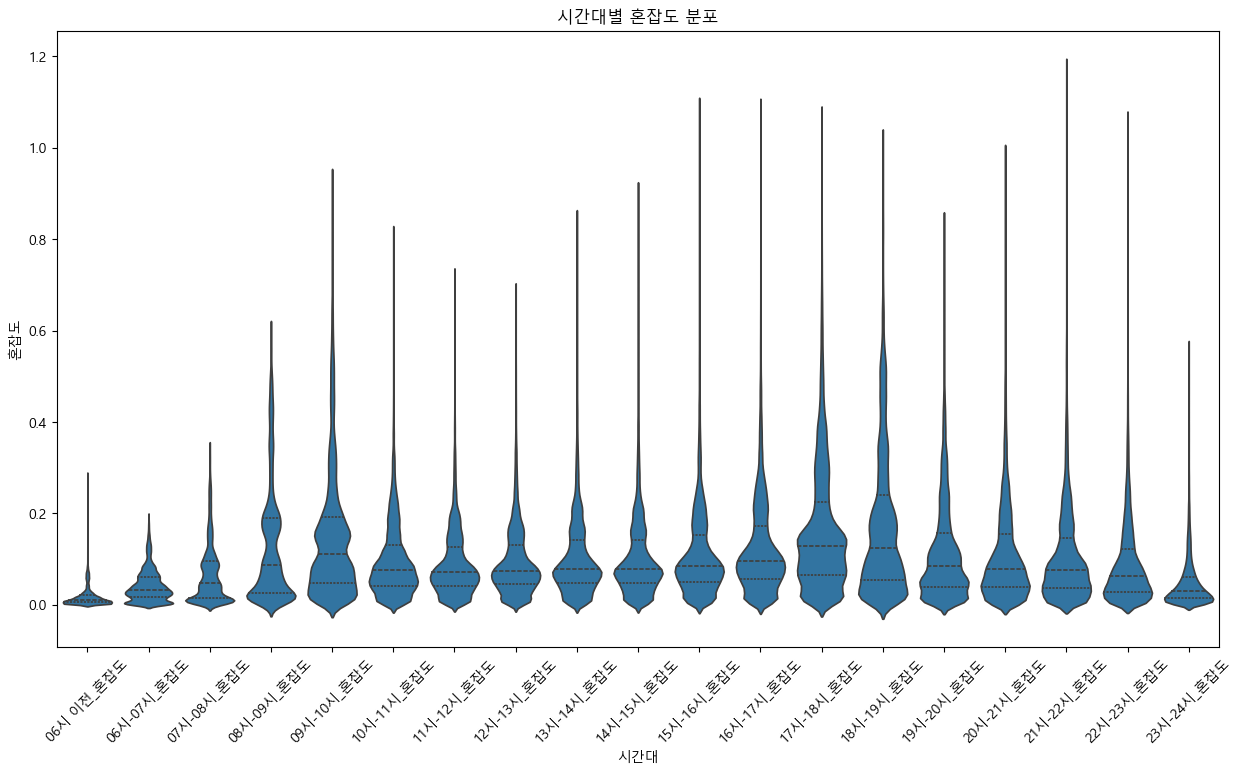

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정(한글 꺠짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 혼잡도 계산 결과 엑셀 파일 불러오기
congestion_data = pd.read_excel('혼잡도계산결과.xlsx')

# 시간대별 혼잡도 컬럼만 추출, '혼잡도'라는 단어가 포함된 컬럼명을 리스트로 추출, 컬럼명 아래로 혼잡도 수치 있음
time_columns = [col for col in congestion_data.columns if '혼잡도' in col]

# 데이터 변환: 시간대별 혼잡도를 하나의 컬럼으로 변환 (melt 이용함)
# 'value_vars': 변환할 대상 컬럼 지정 (혼잡도 컬럼들)
# 'var_name': 시간대를 나타낼 새 컬럼 이름
# 'value_name': 혼잡도 값을 저장할 새 컬럼 이름
integer_data = congestion_data.melt(value_vars=time_columns, var_name='시간대', value_name='혼잡도')
 
# 시간대 정렬
time_slot = ['06시 이전_혼잡도', '06시-07시_혼잡도', '07시-08시_혼잡도', '08시-09시_혼잡도', 
             '09시-10시_혼잡도', '10시-11시_혼잡도', '11시-12시_혼잡도', '12시-13시_혼잡도',
             '13시-14시_혼잡도', '14시-15시_혼잡도', '15시-16시_혼잡도', '16시-17시_혼잡도',
             '17시-18시_혼잡도', '18시-19시_혼잡도', '19시-20시_혼잡도', '20시-21시_혼잡도',
             '21시-22시_혼잡도', '22시-23시_혼잡도', '23시-24시_혼잡도']

# 시간대를 범주형 데이터로 변환하며, 지정한 순서(categories)를 따르게 설정
integer_data['시간대'] = pd.Categorical(integer_data['시간대'], categories=time_slot, ordered=True)

# 바이올린 플롯 생성
plt.figure(figsize=(15, 8))
sns.violinplot(data=integer_data, x='시간대', y='혼잡도', inner="quartile", scale='width')
plt.xticks(rotation=45)
plt.title('시간대별 혼잡도 분포')
plt.xlabel('시간대')
plt.ylabel('혼잡도')

plt.show()

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
week_data = pd.read_excel('혼잡도계산결과.xlsx')

# 날짜를 기준으로 요일 정보 추가
week_data['날짜'] = pd.to_datetime(week_data['날짜'])
week_data['요일'] = week_data['날짜'].dt.dayofweek  # 월=0, ..., 일=6

# 시간대별 혼잡도 컬럼 추출
congestion_columns = [col for col in week_data.columns if '혼잡도' in col]

# 주말과 평일 데이터를 변환 (melt)
weekend_data = week_data[week_data['요일'].isin([5, 6])].melt(id_vars=['역명'],
                                                            value_vars=congestion_columns,
                                                            var_name='시간대',
                                                            value_name='혼잡도')
weekend_data['구분'] = '주말'

weekday_data = week_data[~week_data['요일'].isin([5, 6])].melt(id_vars=['역명'],
                                                             value_vars=congestion_columns,
                                                             var_name='시간대',
                                                             value_name='혼잡도')

weekday_data['구분'] = '평일'

# 두 데이터 병합
combined_data = pd.concat([weekend_data, weekday_data], ignore_index=True)


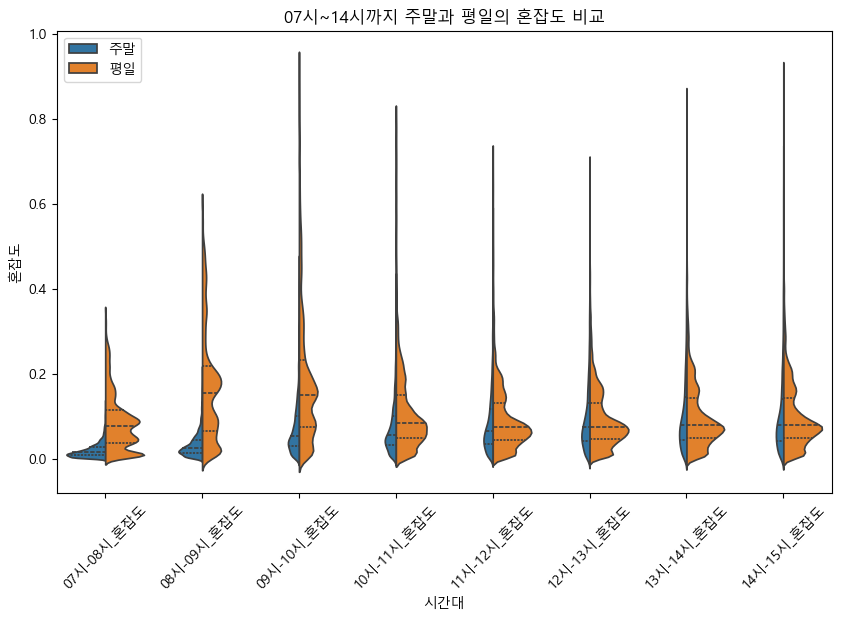

In [6]:
# 특정 시간대 필터링
filtered_data = combined_data[combined_data['시간대'].isin(['07시-08시_혼잡도', '08시-09시_혼잡도',
                                                         '09시-10시_혼잡도', '10시-11시_혼잡도', 
                                                         '11시-12시_혼잡도','12시-13시_혼잡도',
                                                         '13시-14시_혼잡도', '14시-15시_혼잡도'])]

# 바이올린 플롯 생성
plt.figure(figsize=(10, 6))
sns.violinplot(x='시간대', y='혼잡도', hue='구분', data=filtered_data, split=True, inner='quartile')

plt.title('07시~14시까지 주말과 평일의 혼잡도 비교')
plt.xlabel('시간대')
plt.ylabel('혼잡도')
plt.xticks(rotation=45)
plt.legend()
plt.show()

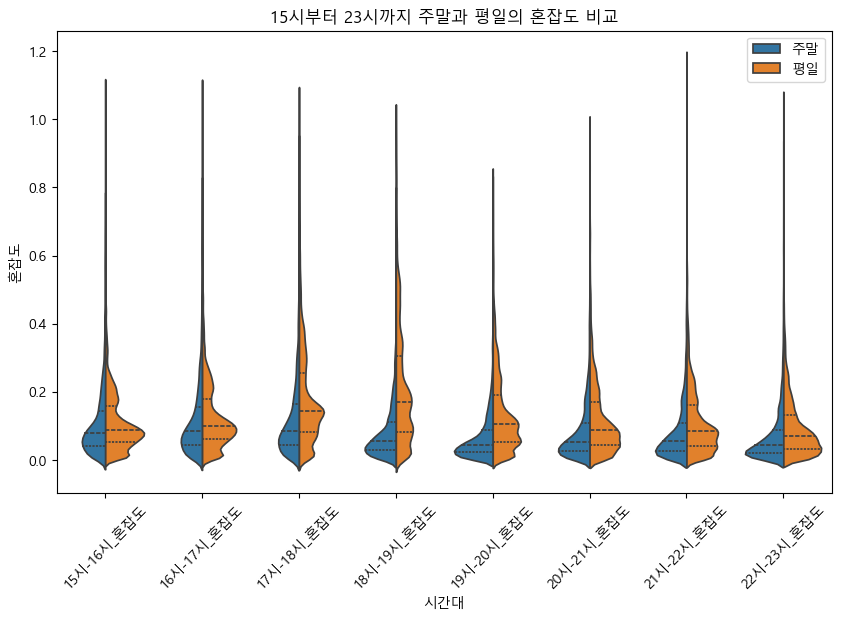

In [7]:
# 특정 시간대 필터링 (출근 시간대 예제)
filtered_data = combined_data[combined_data['시간대'].isin(['15시-16시_혼잡도', '16시-17시_혼잡도',
                                                         '17시-18시_혼잡도', '18시-19시_혼잡도', 
                                                         '19시-20시_혼잡도','20시-21시_혼잡도',
                                                         '21시-22시_혼잡도', '22시-23시_혼잡도'])]

# 바이올린 플롯 생성
plt.figure(figsize=(10, 6))
sns.violinplot(x='시간대', y='혼잡도', hue='구분', data=filtered_data, split=True, inner='quartile')

plt.title('15시부터 23시까지 주말과 평일의 혼잡도 비교')
plt.xlabel('시간대')
plt.ylabel('혼잡도')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [8]:
import pandas as pd

# 기상 자료를 weather_data에 데이터 프레임으로 저장
weather_data = pd.read_csv('2018~2023 기상자료.csv', encoding='euc-kr')

# '일시'열을 날짜 및 시간 형식으로 변환
weather_data['일시'] = pd.to_datetime(weather_data['일시'])

# '일시'열에서 시간 추출해서 5시~23시 데이터만 필터링
weather_data['시간'] = weather_data['일시'].dt.hour
filtered_timedata = weather_data[(weather_data['시간'] >= 5) & (weather_data['시간'] <= 23)]

# 필요한 열(기온,습도)만 추출
temperature_humidity_data = filtered_timedata[['일시', '기온(°C)', '습도(%)']]

# csv 파일로 저장 후 정보 확인   
temperature_humidity_data.to_csv('filtered_temperature_humidity.csv', index=False, encoding='utf-8-sig')         
temperature_humidity_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41629 entries, 5 to 52583
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      41629 non-null  datetime64[ns]
 1   기온(°C)  41627 non-null  float64       
 2   습도(%)   41618 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 MB


In [9]:
import pandas as pd

# 파일 불러와서 저장
filtered_weatherdata = pd.read_csv('filtered_temperature_humidity.csv')

# 결측치 확인
temperature_null = filtered_weatherdata['기온(°C)'].isnull().sum()
humidity_null = filtered_weatherdata['습도(%)'].isnull().sum()

print(f"기온 열의 결측치 개수: {temperature_null}")
print(f"습도 열의 결측치 개수: {humidity_null}")

기온 열의 결측치 개수: 2
습도 열의 결측치 개수: 11


In [10]:
# 기온과 습도 열의 결측치를 선형 보간으로 채우기
filtered_weatherdata['기온(°C)'] = filtered_weatherdata['기온(°C)'].interpolate(method='linear')
filtered_weatherdata['습도(%)'] = filtered_weatherdata['습도(%)'].interpolate(method='linear')

# 보간 후 결측치 확인
temperature_null_after = filtered_weatherdata['기온(°C)'].isnull().sum()
humidity_null_after = filtered_weatherdata['습도(%)'].isnull().sum()

print(f"기온 열의 남은 결측치 개수: {temperature_null_after}")
print(f"습도 열의 남은 결측치 개수: {humidity_null_after}")

# 수정된 데이터를 다시 저장
filtered_weatherdata.to_csv('filtered_temperature_humidity.csv', index=False)

기온 열의 남은 결측치 개수: 0
습도 열의 남은 결측치 개수: 0


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 불러와서 데이터프레임에 저장
weather_file = pd.read_csv('filtered_temperature_humidity.csv')  
congestion_data = pd.read_excel('혼잡도계산결과.xlsx')  

# '일시' 열을 날짜 및 시간 형식으로 변환
weather_file['일시'] = pd.to_datetime(weather_file['일시'])
weather_file['날짜'] = weather_file['일시'].dt.date
weather_file['시간'] = weather_file['일시'].dt.hour

# '시청역' 데이터 필터링
sicheong_data = congestion_data[congestion_data['역명'] == '시청']

# 혼잡도 데이터를 melt를 써서 long format으로 변환
melted_sicheong = sicheong_data.melt(id_vars=['날짜', '역명'], 
                                     value_vars=[col for col in sicheong_data.columns if '_혼잡도' in col],
                                     var_name='시간대', value_name='혼잡도')

# 시간대에서 숫자만 추출해 '시간' 열 생성
melted_sicheong['시간'] = melted_sicheong['시간대'].str.extract(r'(\d+)').astype(int)

# '날짜' 열을 datetime 형식으로 변환
melted_sicheong['날짜'] = pd.to_datetime(melted_sicheong['날짜']).dt.date

# 날씨 데이터와 혼잡도 데이터 병합 (날짜와 시간 기준)
merged_data = pd.merge(melted_sicheong, weather_file[['날짜', '시간', '기온(°C)', '습도(%)']],
                       on=['날짜', '시간'], how='inner')

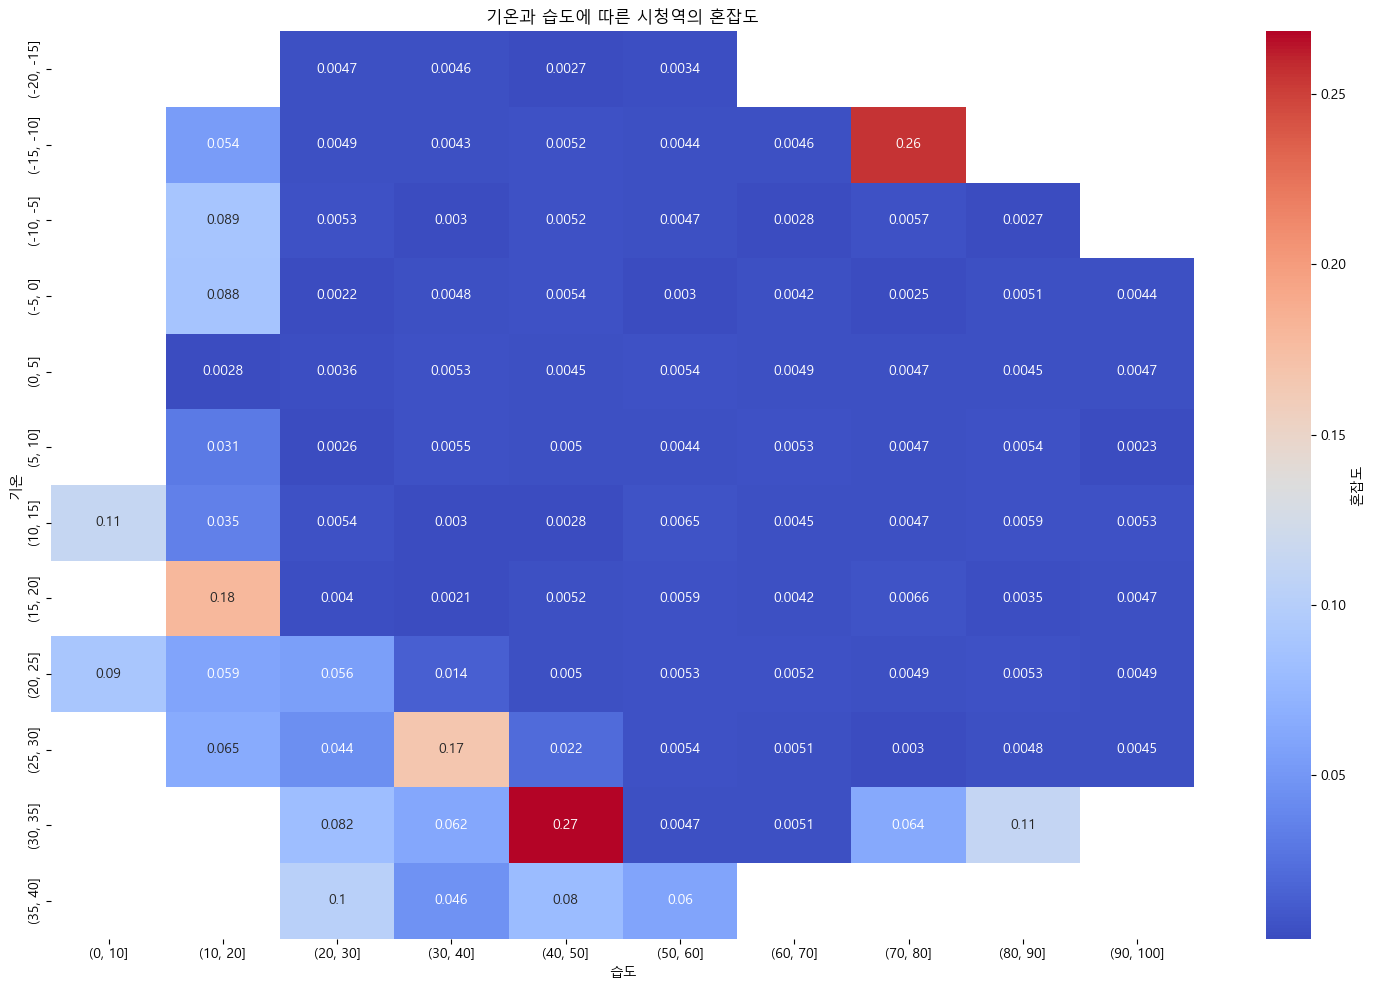

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정(한글 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 기온과 습도 구간화,  -20°C ~ 40°C, 5°C 간격, 0% ~ 100%, 10% 간격
merged_data['기온'] = pd.cut(merged_data['기온(°C)'], bins=range(-20, 41, 5))  
merged_data['습도'] = pd.cut(merged_data['습도(%)'], bins=range(0, 101, 10))   

# 데이터 중복 확인 및 제거
unique_data = merged_data.drop_duplicates(subset=['기온', '습도'])

# 피벗 테이블 생성 
heatmap_data = unique_data.pivot(index='기온', columns='습도', values='혼잡도')

# 히트맵 생성
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '혼잡도'}, annot=True)
plt.title('기온과 습도에 따른 시청역의 혼잡도')
plt.xlabel('습도')
plt.ylabel('기온')
plt.tight_layout()
plt.show()

기온과 혼잡도의 상관계수: 0.043
습도와 혼잡도의 상관계수: -0.110


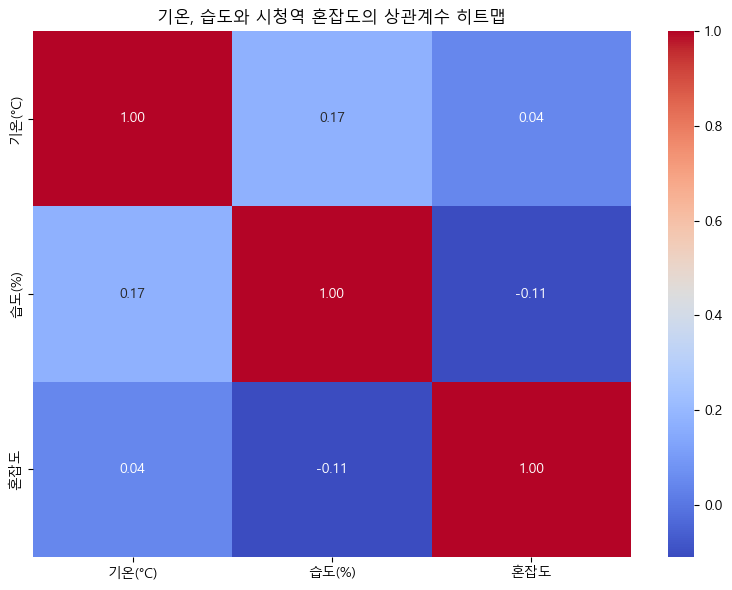

In [13]:
# 상관계수 계산 (기온, 습도와 혼잡도)
corr_temp_congestion = merged_data['기온(°C)'].corr(merged_data['혼잡도'])
corr_humidity_congestion = merged_data['습도(%)'].corr(merged_data['혼잡도'])

print(f"기온과 혼잡도의 상관계수: {corr_temp_congestion:.3f}")
print(f"습도와 혼잡도의 상관계수: {corr_humidity_congestion:.3f}")

# 히트맵으로 상관계수 시각화
correlation_matrix = merged_data[['기온(°C)', '습도(%)', '혼잡도']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('기온, 습도와 시청역 혼잡도의 상관계수 히트맵')
plt.tight_layout()
plt.show()


In [14]:
# '충정로역' 데이터 필터링
chungjung_data = congestion_data[congestion_data['역명'] == '충정로(경기대입구)']

# 혼잡도 데이터를 melt를 써서 long format으로 변환
melted_chungjung = chungjung_data.melt(id_vars=['날짜', '역명'], 
                                     value_vars=[col for col in chungjung_data.columns if '_혼잡도' in col],
                                     var_name='시간대', value_name='혼잡도')

# 시간대에서 숫자만 추출해 '시간' 열 생성
melted_chungjung['시간'] = melted_chungjung['시간대'].str.extract(r'(\d+)').astype(int)

# '날짜' 열을 datetime 형식으로 변환
melted_chungjung['날짜'] = pd.to_datetime(melted_chungjung['날짜']).dt.date

# 날씨 데이터와 혼잡도 데이터 병합 (날짜와 시간 기준)
merged_data = pd.merge(melted_chungjung, weather_file[['날짜', '시간', '기온(°C)', '습도(%)']],
                       on=['날짜', '시간'], how='inner')

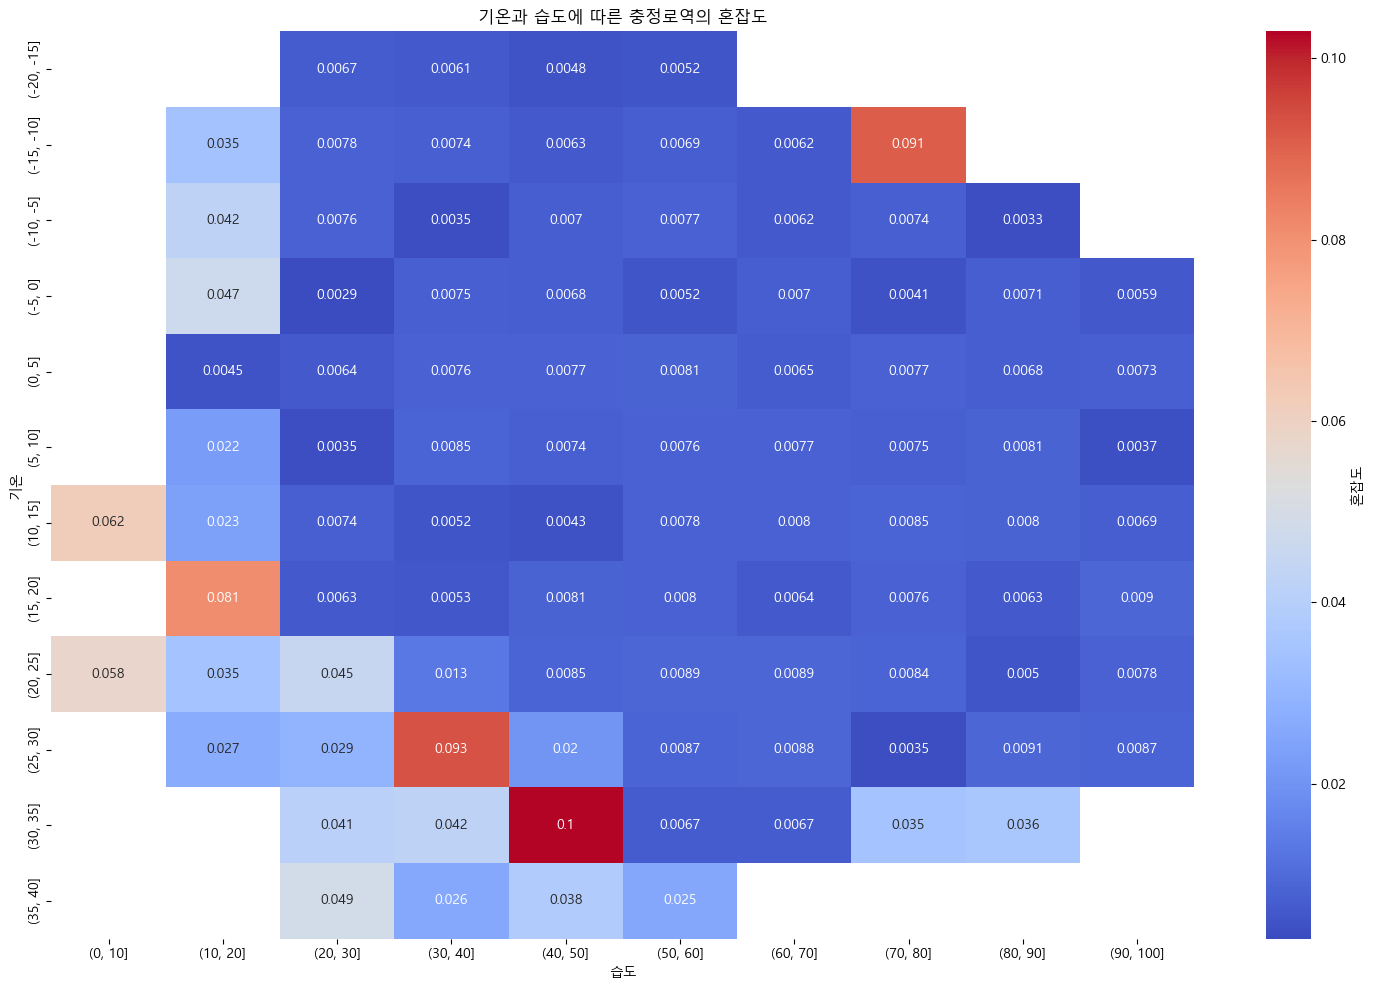

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정(한글 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 기온과 습도 구간화,  -20°C ~ 40°C, 5°C 간격, 0% ~ 100%, 10% 간격
merged_data['기온'] = pd.cut(merged_data['기온(°C)'], bins=range(-20, 41, 5))  
merged_data['습도'] = pd.cut(merged_data['습도(%)'], bins=range(0, 101, 10))   

# 데이터 중복 확인 및 제거
unique_data = merged_data.drop_duplicates(subset=['기온', '습도'])

# 피벗 테이블 생성 
heatmap_data = unique_data.pivot(index='기온', columns='습도', values='혼잡도')

# 히트맵 생성
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '혼잡도'}, annot=True)
plt.title('기온과 습도에 따른 충정로역의 혼잡도')
plt.xlabel('습도')
plt.ylabel('기온')
plt.tight_layout()
plt.show()

기온과 혼잡도의 상관계수: 0.043
습도와 혼잡도의 상관계수: -0.126


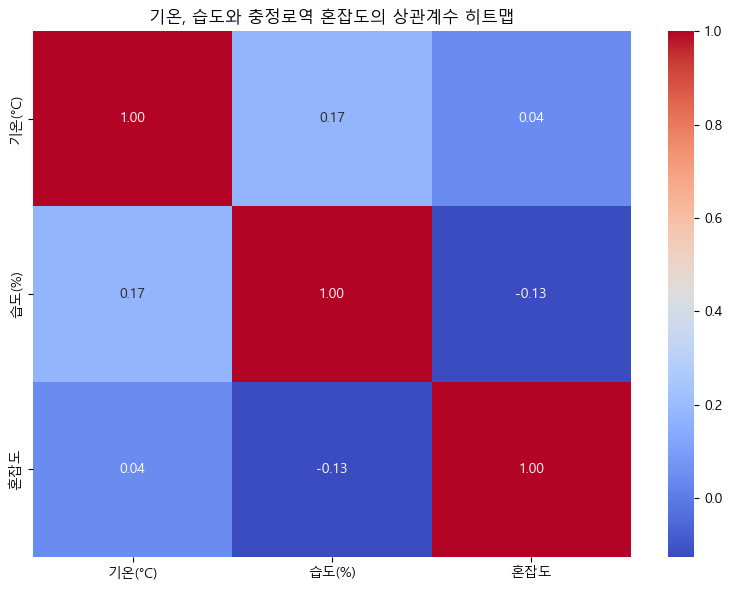

In [16]:
# 상관계수 계산 (기온, 습도와 혼잡도)
corr_temp_congestion = merged_data['기온(°C)'].corr(merged_data['혼잡도'])
corr_humidity_congestion = merged_data['습도(%)'].corr(merged_data['혼잡도'])

print(f"기온과 혼잡도의 상관계수: {corr_temp_congestion:.3f}")
print(f"습도와 혼잡도의 상관계수: {corr_humidity_congestion:.3f}")

# 히트맵으로 상관계수 시각화
correlation_matrix = merged_data[['기온(°C)', '습도(%)', '혼잡도']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('기온, 습도와 충정로역 혼잡도의 상관계수 히트맵')
plt.tight_layout()
plt.show()


In [17]:
# '을지로입구역' 데이터 필터링
eulji_data = congestion_data[congestion_data['역명'] == '을지로입구']

# 혼잡도 데이터를 melt를 써서 long format으로 변환
melted_eulji = eulji_data.melt(id_vars=['날짜', '역명'], 
                                     value_vars=[col for col in eulji_data.columns if '_혼잡도' in col],
                                     var_name='시간대', value_name='혼잡도')

# 시간대에서 숫자만 추출해 '시간' 열 생성
melted_eulji['시간'] = melted_eulji['시간대'].str.extract(r'(\d+)').astype(int)

# '날짜' 열을 datetime 형식으로 변환
melted_eulji['날짜'] = pd.to_datetime(melted_eulji['날짜']).dt.date

# 날씨 데이터와 혼잡도 데이터 병합 (날짜와 시간 기준)
merged_data = pd.merge(melted_eulji, weather_file[['날짜', '시간', '기온(°C)', '습도(%)']],
                       on=['날짜', '시간'], how='inner')

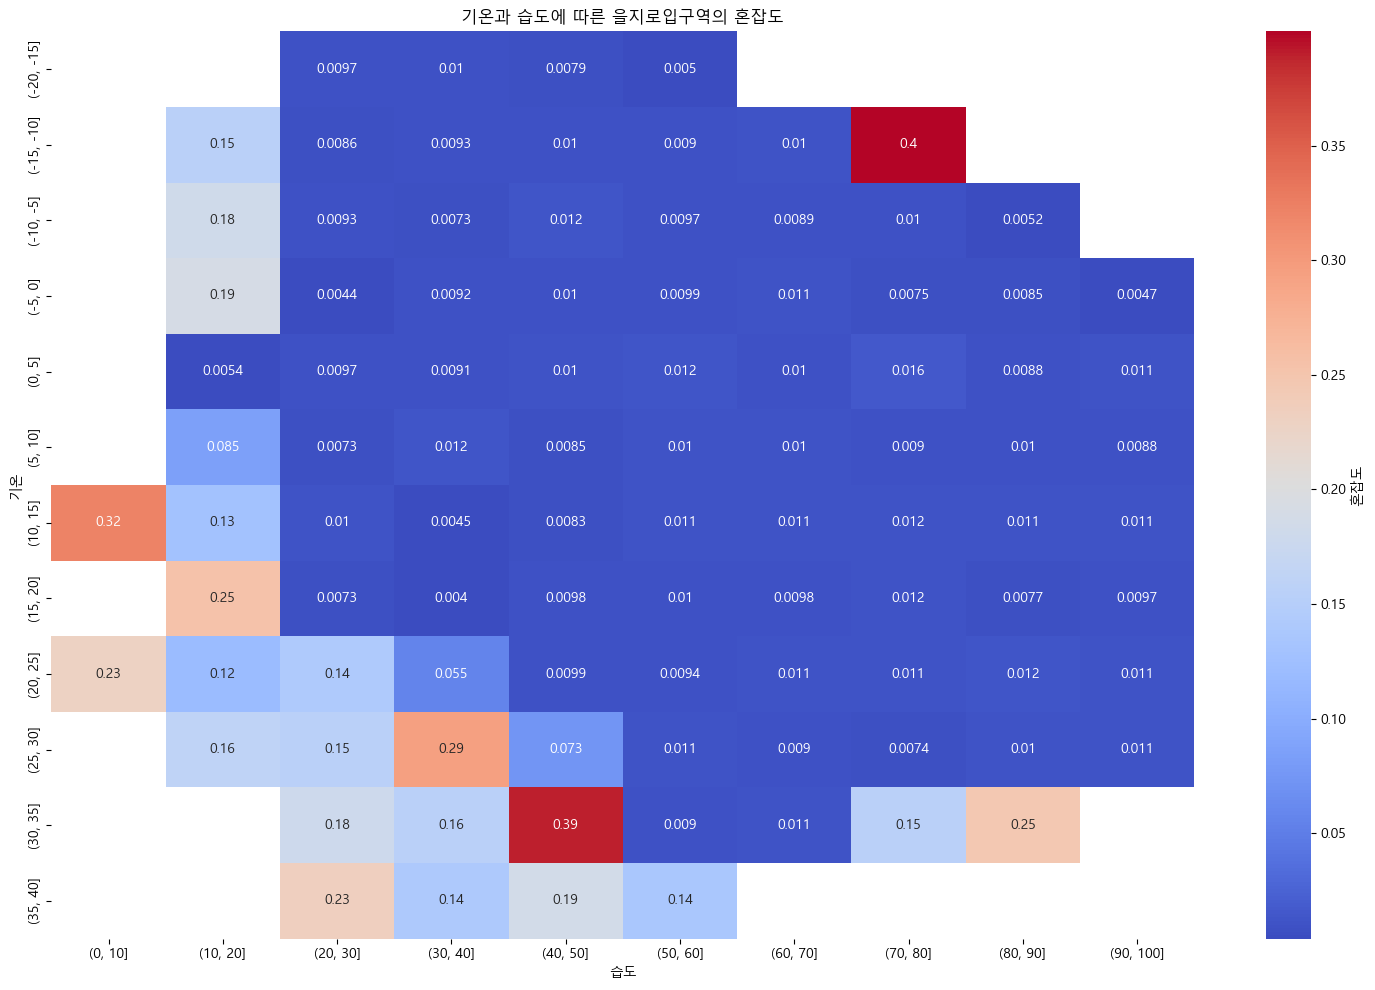

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정(한글 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 기온과 습도 구간화,  -20°C ~ 40°C, 5°C 간격, 0% ~ 100%, 10% 간격
merged_data['기온'] = pd.cut(merged_data['기온(°C)'], bins=range(-20, 41, 5))  
merged_data['습도'] = pd.cut(merged_data['습도(%)'], bins=range(0, 101, 10))   

# 데이터 중복 확인 및 제거
unique_data = merged_data.drop_duplicates(subset=['기온', '습도'])

# 피벗 테이블 생성 
heatmap_data = unique_data.pivot(index='기온', columns='습도', values='혼잡도')

# 히트맵 생성
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '혼잡도'}, annot=True)
plt.title('기온과 습도에 따른 을지로입구역의 혼잡도')
plt.xlabel('습도')
plt.ylabel('기온')
plt.tight_layout()
plt.show()

기온과 혼잡도의 상관계수: 0.058
습도와 혼잡도의 상관계수: -0.179


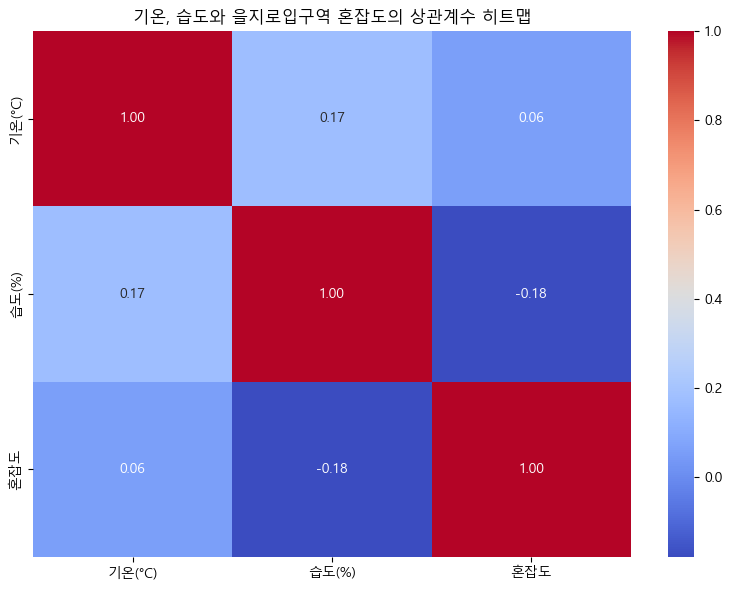

In [19]:
# 상관계수 계산 (기온, 습도와 혼잡도)
corr_temp_congestion = merged_data['기온(°C)'].corr(merged_data['혼잡도'])
corr_humidity_congestion = merged_data['습도(%)'].corr(merged_data['혼잡도'])

print(f"기온과 혼잡도의 상관계수: {corr_temp_congestion:.3f}")
print(f"습도와 혼잡도의 상관계수: {corr_humidity_congestion:.3f}")

# 히트맵으로 상관계수 시각화
correlation_matrix = merged_data[['기온(°C)', '습도(%)', '혼잡도']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('기온, 습도와 을지로입구역 혼잡도의 상관계수 히트맵')
plt.tight_layout()
plt.show()
